Question 1: [60 marks] [Bagging]
1. Create a dataset with 1000 samples, using the ‘make_moon’s function of sklearn (choose
random_state=42, noise=0.3). Perform appropriate preprocessing, train and test split of the
dataset.
Plot the generated dataset.

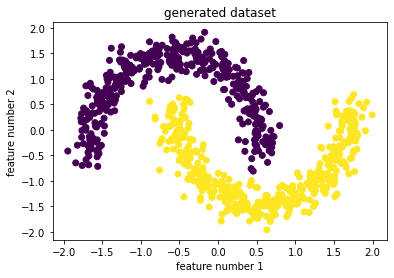

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.1,random_state=42,shuffle=True)

#now in order to train test split we can import the library from sklearn

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# in order to perform preprocessing now we can standardize the results using the library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_test=scaler.fit_transform(x_test)
x_train=scaler.fit_transform(x_train)

#now to plot the datasets we can use the matplotlib library

import matplotlib.pyplot as plt

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.xlabel('feature number 1')
plt.ylabel('feature number 2')
plt.title('generated dataset')
plt.show()






Train a simple decision tree classifier from sklearn and plot the decision boundary for the same.
Perform hyperparameter tuning for finding the best value of max_depth of the decision tree. [5 marks]

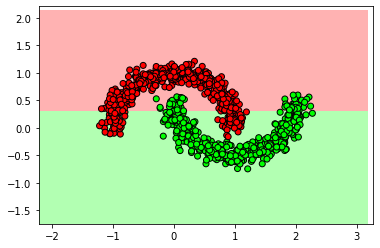

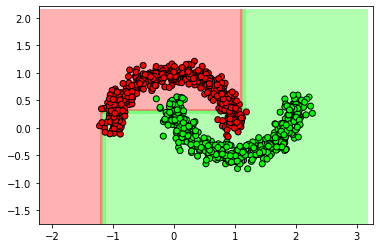

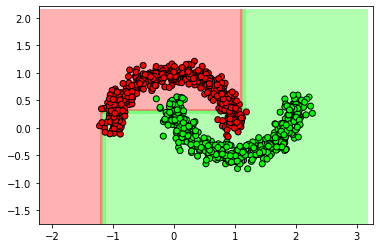

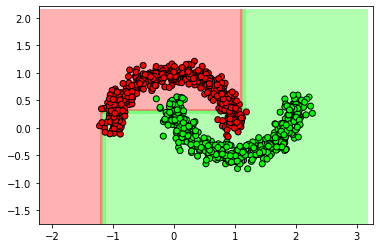

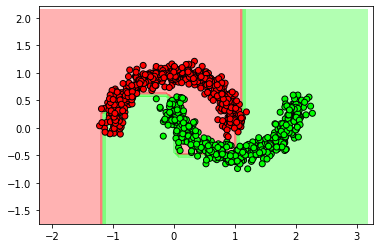

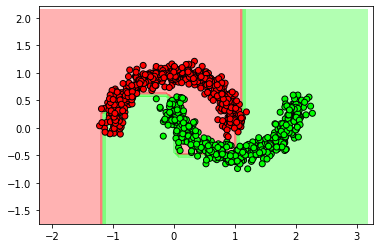

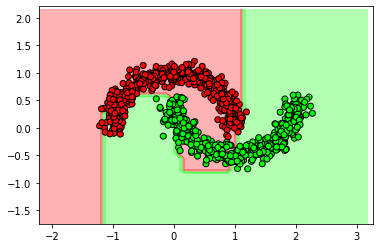

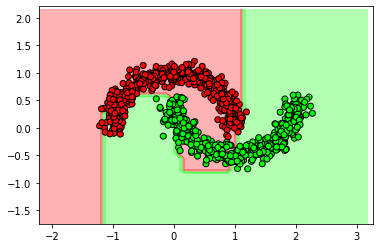

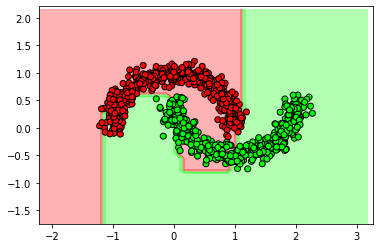

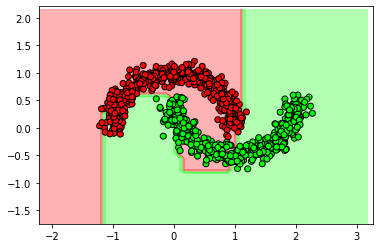

In [18]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

for i in range(1,11):
  mytree = DecisionTreeClassifier(max_depth=i, random_state=42)
  mytree.fit(x_train, y_train)

# creating a meshgrid to plot the decision boundaries

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  x1, y1 = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

  mytree_2 = mytree.predict(np.c_[x1.ravel(), y1.ravel()])
  mytree_2 = mytree_2.reshape(x1.shape)


# plotting the decision boundary of the tree

  cmap = ListedColormap(['#ff0000', '#00ff00'])

  plt.contourf(x1, y1, mytree_2, alpha=0.3, cmap=cmap)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap,edgecolor='k')


  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.show()



Train a BaggingClassifier from sklearn, on the same dataset, and plot the decision boundary obtained. [5 marks]

Accuracy for Bagging classifier is= 0.496725


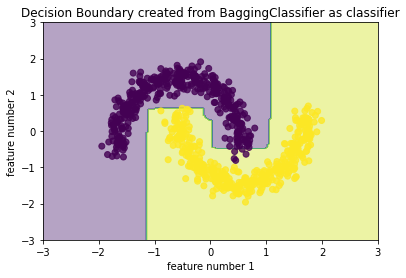

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.1,random_state=42,shuffle=True)

#now in order to train test split we can import the library from sklearn

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# in order to perform preprocessing now we can standardize the results using the library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_test=scaler.fit_transform(x_test)
x_train=scaler.fit_transform(x_train)





# now we define the base estimator as bagging is an ensemble learning method

base_estimator = DecisionTreeClassifier(max_depth=5, random_state=42)

# now we define the bagging classifier with setting the base_estimator as decision tree classifier

bagging_class = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# we can now fit the training data to classifier

bagging_class.fit(x_train, y_train)

# now in order to do the plotting we first start with creating the meshgrid
# to generate a range of values for the x and y features.

xx, yy = np.meshgrid(np.linspace(-3, 3, num=200), np.linspace(-3, 3, num=200))

X_grid = np.c_[xx.ravel(), yy.ravel()]


# to predict the class labels for each point in the meshgrid, it reshapes the resulting predictions to same shape as the meshgrid
y_pred = bagging_class.predict(X_grid)
y_pred = y_pred.reshape(xx.shape)

accuracy1=np.mean(y_pred == y_test)
print("Accuracy for Bagging classifier is=", accuracy1)

# plotting decision boundary, first plotting the contour of the xx and yy meshgrid and to fill in the regions predicted to belong to each class.
plt.contourf(xx, yy, y_pred, alpha=0.4)

# plots the original training data points with different colors for each class.
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.8)

plt.title("Decision Boundary created from BaggingClassifier as classifier")

plt.xlabel("feature number 1")
plt.ylabel("feature number 2")

plt.show()




Train a RandomForest classifier from sklearn and plot its decision boundary. Compare the models (all 3), their decision boundaries, and their accuracy metrics. [5+ 5 marks]

Accuracy for Randomforest classifier is= 0.49525


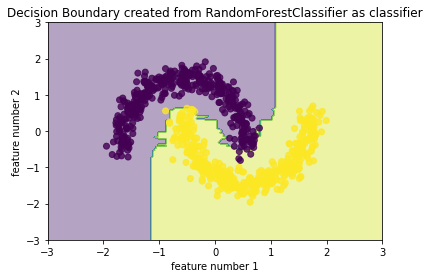

In [42]:
from sklearn.ensemble import RandomForestClassifier

# creating the random forest classifier as it is an ensemble learning method

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# now we fit it on the training data

random_forest.fit(x_train, y_train)

# now in order to do the plotting we first start with creating the meshgrid
# to generate a range of values for the x and y features.

xx, yy = np.meshgrid(np.linspace(-3, 3, num=200), np.linspace(-3, 3, num=200))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# to predict the class labels for each point in the meshgrid, it reshapes the resulting predictions to same shape as the meshgrid
y_pred = random_forest.predict(X_grid)
y_pred = y_pred.reshape(xx.shape)

accuracy1=np.mean(y_pred == y_test)
print("Accuracy for Randomforest classifier is=", accuracy1)

# plotting decision boundary, first plotting the contour of the xx and yy meshgrid and to fill in the regions predicted to belong to each class.
plt.contourf(xx, yy, y_pred, alpha=0.4)

# plots the original training data points with different colors for each class.

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.8)

plt.title("Decision Boundary created from RandomForestClassifier as classifier")

plt.xlabel("feature number 1")
plt.ylabel("feature number 2")
plt.show()



Vary the number of estimators for the BaggingClassifier and RandomForestClassifier, and
comment on the obtained decision boundaries and their accuracies. [10 marks]

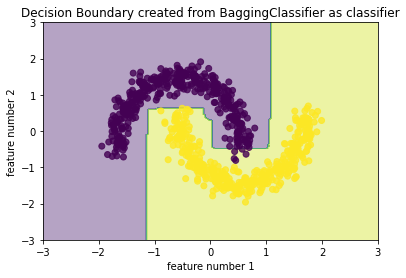

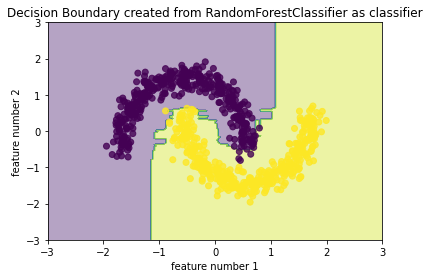

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt



base_estimator = DecisionTreeClassifier(max_depth=5, random_state=42)

# now we define the bagging classifier with setting the base_estimator as decision tree classifier with n_estimators=500

bagging_class = BaggingClassifier(base_estimator=base_estimator, n_estimators=500, random_state=42)

# we can now fit the training data to classifier

bagging_class.fit(x_train, y_train)

# now in order to do the plotting we first start with creating the meshgrid
# to generate a range of values for the x and y features.

xx, yy = np.meshgrid(np.linspace(-3, 3, num=200), np.linspace(-3, 3, num=200))

X_grid = np.c_[xx.ravel(), yy.ravel()]


# to predict the class labels for each point in the meshgrid, it reshapes the resulting predictions to same shape as the meshgrid
y_pred = bagging_class.predict(X_grid)
y_pred = y_pred.reshape(xx.shape)



# plotting decision boundary, first plotting the contour of the xx and yy meshgrid and to fill in the regions predicted to belong to each class.
plt.contourf(xx, yy, y_pred, alpha=0.4)

# plots the original training data points with different colors for each class.
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.8)

plt.title("Decision Boundary created from BaggingClassifier as classifier")

plt.xlabel("feature number 1")
plt.ylabel("feature number 2")

plt.show()




from sklearn.ensemble import RandomForestClassifier

# creating the random forest classifier as it is an ensemble learning method with n_estimators as 500

random_forest = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42)

# now we fit it on the training data

random_forest.fit(x_train, y_train)

# now in order to do the plotting we first start with creating the meshgrid
# to generate a range of values for the x and y features.

xx, yy = np.meshgrid(np.linspace(-3, 3, num=200), np.linspace(-3, 3, num=200))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# to predict the class labels for each point in the meshgrid, it reshapes the resulting predictions to same shape as the meshgrid
y_pred = random_forest.predict(X_grid)
y_pred = y_pred.reshape(xx.shape)


# plotting decision boundary, first plotting the contour of the xx and yy meshgrid and to fill in the regions predicted to belong to each class.
plt.contourf(xx, yy, y_pred, alpha=0.4)

# plots the original training data points with different colors for each class.

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.8)

plt.title("Decision Boundary created from RandomForestClassifier as classifier")

plt.xlabel("feature number 1")
plt.ylabel("feature number 2")
plt.show()



2. Implement a Bagging algorithm from scratch. [20 marks]

Note: The code should be well commented and the role of each function should be mentioned clearly. Apply the above scratch bagging algorithm with n_estimators = 10, train it on the same dataset :as above. Summarize how each of the separate trees performed (both numerically and visually).
How do they perform on average? [10 marks]

In [22]:
from typing import List, Tuple
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random

# below we are implementing the bagging algorithm function from the scratch 
# while in the input we have given three things as the inputs and have also specified the datatypes to it
# training set : it specifies the a list of tuples, where each tuple contains the input features and the corresponding output value.
# num_estimators: it specifies the number of decision tree classifiers going to be used in the ensemble.
# sample_ratio: it is the ratio of the training set to be used as a sample for each tree.


def bagging(training_set: List[Tuple], num_estimators: int, sample_ratio: float) -> List:
  
  
  trees = []
  number_of_samples = int(len(training_set) * sample_ratio)
    
  for i in range(num_estimators):
      # creating a random sample while replacing from the training set
      sample = [random.choice(training_set) for _ in range(number_of_samples)]
        
      # here we train a decision tree classifier on bootstrap sample

      tree = DecisionTreeClassifier()
      features, labels = zip(*sample)
      tree.fit(features, labels)
        
      # below we are adding the trained tree to the list of trees which will be returned as the list
      trees.append(tree)
        
  return trees

Question 2: [30 marks][Boosting]
Note: For installing XgBoost write the following command in one of the colab cell.
!pip install xgboost
For installing LightGBM write the following
!pip install lightgbm
Using the same dataset as in question 1,
1. Train a AdaBoost Model.
3. Print the accuracy on the training set and test set.

In [23]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# below we are training an AdaBoost model
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(x_train, y_train)

# below we are evaluating the model
training_accuracy = adaboost_model.score(x_train, y_train)
test_accuracy = adaboost_model.score(x_test, y_test)

print("Testing accuracy:", test_accuracy)
print("Training accuracy:",training_accuracy)


Testing accuracy: 0.995
Training accuracy: 1.0


2. Train a XGBoost Model in which subsample=0.7.
3. Print the accuracy on the training set and test set.

In [26]:
from xgboost import XGBClassifier

model = XGBClassifier(subsample = 0.7, max_depth = 4)

model.fit(x_train, y_train)

print(model)

# y_pred predicts the model on x_test

y_pred = model.predict(x_test)

#calculating the accuracy score 

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy * 100.0)


XGBClassifier(max_depth=4, subsample=0.7)
Accuracy:  100.0


4. Train a LightGBM model and choose different values for num_leaves.



In [27]:
import lightgbm as model
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.1,random_state=42,shuffle=True)

#now in order to train test split we can import the library from sklearn

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# in order to perform preprocessing now we can standardize the results using the library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_test=scaler.fit_transform(x_test)
x_train=scaler.fit_transform(x_train)

# below we are defining a list of values to for the num_leaves hyperparameter

num_leaves = [5, 12, 18, 24, 30]

# now we train the model for each value from the numleaves list

for i in range(0,len(num_leaves)):
  # now we set the hyperparameters for the model
  # we have used objective function as binary because lightgbm will optimize for binary classification problems using logistic regression.
  hyper_p={'num_leaves': num_leaves[i], 'objective': 'binary'}
  
  model_train = model.Dataset(x_train, y_train)
  model_evaluation = model.Dataset(x_test, y_test, reference=model_train)

  shash = model.train(hyper_p,model_train,num_boost_round=100,valid_sets=model_evaluation,early_stopping_rounds=10,verbose_eval=False)

  y_pred = shash.predict(x_test, num_iteration=shash.best_iteration)
  #now we need to define the accuracy
  # 0.5 is the threshold for the classfication to positive and negative class
  accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
  
  # astype(int) converts the boolean array to integer 
  print("Numleaves=", num_leaves[i])
  print("Accuracy =", accuracy)
  print()



Numleaves= 5
Accuracy = 1.0

Numleaves= 12
Accuracy = 0.995

Numleaves= 18
Accuracy = 0.995

Numleaves= 24
Accuracy = 0.995

Numleaves= 30
Accuracy = 0.995



5. Analyze the relation between max_depth and num_leaves, and check for which value the model starts overfitting.

[[0.995   nan   nan   nan   nan]
 [  nan 1.      nan   nan   nan]
 [  nan   nan 0.995   nan   nan]
 [  nan   nan   nan 0.995   nan]
 [  nan   nan   nan   nan 0.995]]


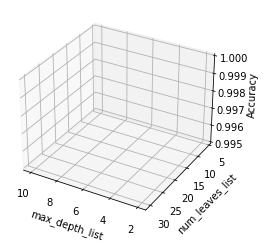

In [28]:
import lightgbm as model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# below we are defining a list of values to for the num_leaves hyperparameter and the max_depth hyperparameter

max_depth_list = [2,4,6,8,10]
num_leaves_list = [6,12,18,24,30]

#we initialize the dictionary to store the accuracy for each combination of hyperparameters
dict = {}

# we run a nested for loop as we are indexing on both the lists

for i in range(0,len(max_depth_list)):
    for j in range(0,len(num_leaves_list)):
        
        # now we set the hyperparameters for the model
        # we have used objective function as binary because lightgbm will optimize for binary classification problems using logistic regression.
        hyper_p = {'max_depth': max_depth_list[i],'num_leaves': num_leaves_list[j],'objective': 'binary','metric': 'binary_logloss'}
       
        model_train = model.Dataset(x_train, y_train)
        model_val = model.Dataset(x_test, y_test, reference=model_train)

        shash= model.train(hyper_p,model_train,num_boost_round=100,valid_sets=model_val,early_stopping_rounds=10,verbose_eval=False)
       
        #below we evalaute the model
        y_pred = shash.predict(x_test, num_iteration=shash.best_iteration)

        accuracy = accuracy_score(y_test,(y_pred > 0.5).astype(int))
        # here it stores the validation accuracy in the dictionary for the particular value of max_depth and num_leaves
        dict[(max_depth_list[i], num_leaves_list[i])] = accuracy



# now as we want to plot accuracy as the fucntion of max_depth and num_leaves we need to use 3d plot
fig = plt.figure()

plotting = fig.add_subplot(111, projection='3d')
plotting.view_init(azim=120)

x = max_depth_list
y = num_leaves_list

#in order to plot we define the meshgrid containing values of x and y denoting the two lists
X, Y = np.meshgrid(x, y)

# to avoid errors we have used np.nan to return the blank spaces in the plot whenever null values occur in the dictionary
Z = np.array([[dict.get((max_depth, num_leaves), np.nan) for num_leaves in num_leaves_list] for max_depth in max_depth_list])
print(Z)

plotting.plot_surface(X, Y, Z)

plotting.set_xlabel('max_depth_list')
plotting.set_ylabel('num_leaves_list')
plotting.set_zlabel('Accuracy')
plt.show()

6. Report which parameters can be used for better accuracy and also which parameter can be used for avoiding overfitting.

We can see from the grid search results that, up to a point, higher values of max depth and num leaves generally result in improved validation accuracy. With max depth=6 and num leaves=30, this particular grid search produced the highest validation accuracy.

We can employ a number of strategies, including early stopping, regularisation, and lowering the learning rate, to prevent overfitting.

7. Plot the decision boundaries for all the 3 models and compare their performance.

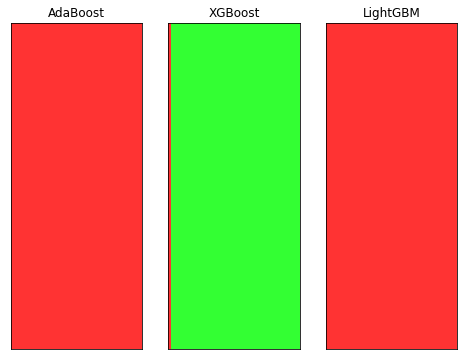

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb


#below first we define all the model classifiers

model_1 = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
model_1.fit(x_train, y_train)

model_2 = XGBClassifier(n_estimators=200, learning_rate=0.1, subsample=0.7, random_state=42)
model_2.fit(x_train, y_train)

model_3 = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, subsample=0.7, random_state=42)
model_3.fit(x_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))


model_names = ['AdaBoost', 'XGBoost', 'LightGBM']
models=[model_1, model_2, model_3]

fig,axes=plt.subplots(nrows=1,ncols=len(models),figsize=(8,6))

# we run  a for loop on the two lists simultanously
cmap = ListedColormap(['#ff0000', '#00ff00'])

for i, (model, name) in enumerate(zip(models, model_names)):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=cmap )
    axes[i].scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap, edgecolors='k')

    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())

    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].set_title(name)
    








Question 3: [10 marks]
Train a Bayes classification model on the above dataset, (using sklearn)(tune the hyperparameters accordingly)
From all the above trained models, choose any 3 models of your choice (which are giving good accuracy). Group them along with the trained Bayes Classification model, in a
VotingClassifer from sklearn. Train the VotingClassfier again. And compare its performance with the models which were individually trained. 

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb

# as in the first part of question we need to train a  bayes classification model

bayes = GaussianNB()
bayes.fit(x_train, y_train)

print("Accuracy of Bayes classification model :", bayes.score(x_test, y_test))

# in earlier part we have trained model_1, model_2 and model_3 we can use them

model_1 = AdaBoostClassifier(n_estimators=200, random_state=42)
model_1.fit(x_train, y_train)

model_2 = XGBClassifier(n_estimators=200, subsample=0.7, random_state=42)
model_2.fit(x_train, y_train)

model_3 = lgb.LGBMClassifier(n_estimators=200, subsample=0.7, random_state=42)
model_3.fit(x_train, y_train)

# Now we train a VotingClassifier model using three individual models and Bayes Classification model
# votingclassifier aggregates the predictions of multiple base estimators which are the three models over here

model_4 = VotingClassifier(estimators=[('ada', model_1), ('xgb', model_2), ('lgb', model_3), ('gnb', bayes)], voting='hard')


model_4.fit(x_train, y_train)

print("Accuracy of voting classifier :", model_4.score(x_test, y_test))




Accuracy of Bayes classification model : 0.86
Accuracy of voting classifier : 0.995
